In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
np.random.seed(0)

In [3]:
def create_data(p,size):
    return bernoulli.rvs(p,size=size)

In [4]:
x1,x2=create_data(0.5,100),create_data(0.8,100)
df1=pd.DataFrame({"x1":x1,"x2":x2})
df1.head()

,x1,x2
0,1,1
1,1,1
2,1,1
3,1,0
4,0,1


In [5]:
x1,x2 = create_data(0.9,100), create_data(0.2,100)
df2=pd.DataFrame({"x1":x1,"x2":x2})
df2.head()

,x1,x2
0,1,1
1,1,0
2,1,0
3,1,0
4,1,0


In [6]:
df = pd.concat([df1, df2])
df.head(),df.shape

(   x1  x2
 0   1   1
 1   1   1
 2   1   1
 3   1   0
 4   0   1, (200, 2))

In [7]:
a = 0.5
train_df1, test_df1 = train_test_split(df1, test_size = a)
train_df2, test_df2 = train_test_split(df2, test_size = a)

In [8]:
def do_something(df):
    res =[]
    i = 1 
    while(i<51):
        temp = df.sample(i)
        temp.columns = ['xx','yy']
        temp_prediction =np.array([np.sum(temp['xx'])/i, np.sum(temp['yy'])/i])
        res.append(temp_prediction)
        i = i + 1 
    res=np.array(res)
    return res

In [9]:
res=do_something(df1)
mle1 = np.average(res, axis=0)
res,mle1

(array([[0.        , 0.        ],
        [0.5       , 0.5       ],
        [0.        , 0.66666667],
        [0.75      , 1.        ],
        [0.6       , 0.8       ],
        [0.5       , 0.66666667],
        [0.42857143, 0.85714286],
        [0.75      , 0.75      ],
        [0.11111111, 0.77777778],
        [0.5       , 0.8       ],
        [0.09090909, 0.90909091],
        [0.33333333, 0.91666667],
        [0.46153846, 0.69230769],
        [0.57142857, 1.        ],
        [0.53333333, 0.86666667],
        [0.25      , 0.875     ],
        [0.58823529, 0.82352941],
        [0.66666667, 0.77777778],
        [0.57894737, 0.89473684],
        [0.45      , 0.7       ],
        [0.57142857, 0.9047619 ],
        [0.40909091, 0.81818182],
        [0.39130435, 0.7826087 ],
        [0.45833333, 0.91666667],
        [0.52      , 0.84      ],
        [0.38461538, 0.73076923],
        [0.55555556, 0.66666667],
        [0.46428571, 0.78571429],
        [0.5862069 , 0.93103448],
        [0.5  

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdf175882d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf02de9250>)

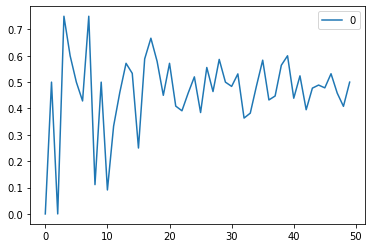

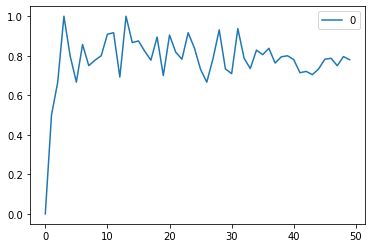

In [10]:
pd.DataFrame(res[:,0]).plot(),pd.DataFrame(res[:,1]).plot()

In [11]:
res=do_something(df1)
mle2 = np.average(res, axis=0)
res,mle2

(array([[1.        , 1.        ],
        [1.        , 1.        ],
        [1.        , 1.        ],
        [0.5       , 0.25      ],
        [0.6       , 0.8       ],
        [0.66666667, 1.        ],
        [0.42857143, 0.71428571],
        [0.5       , 1.        ],
        [0.22222222, 0.77777778],
        [0.5       , 0.9       ],
        [0.45454545, 0.81818182],
        [0.58333333, 0.83333333],
        [0.61538462, 0.92307692],
        [0.57142857, 0.78571429],
        [0.46666667, 0.66666667],
        [0.625     , 0.75      ],
        [0.35294118, 0.82352941],
        [0.5       , 0.66666667],
        [0.52631579, 0.73684211],
        [0.65      , 0.8       ],
        [0.61904762, 0.76190476],
        [0.45454545, 0.68181818],
        [0.52173913, 0.7826087 ],
        [0.5       , 0.75      ],
        [0.4       , 0.88      ],
        [0.46153846, 0.73076923],
        [0.51851852, 0.77777778],
        [0.42857143, 0.85714286],
        [0.55172414, 0.86206897],
        [0.466

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdf02d65890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf028469d0>)

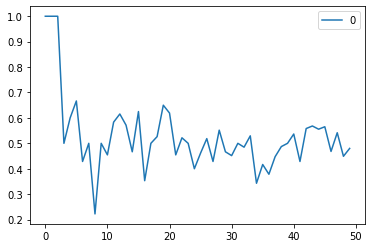

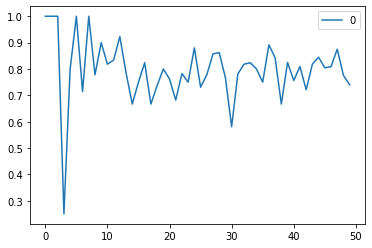

In [12]:
pd.DataFrame(res[:,0]).plot(),pd.DataFrame(res[:,1]).plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


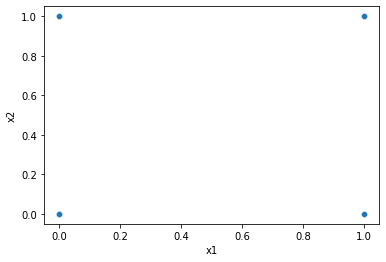

In [13]:
sns.scatterplot(train_df1['x1'], train_df1['x2'])

In [14]:
def derivative(mu, x):
    return (mu**x)*((1-mu)**x)

In [15]:
def do_something2(mle1,mle2,test_df):
    temp1 = list(derivative(mle1[0*1+0], test_df['x1'])*derivative(mle1[1], test_df['x1']))
    temp2 = list(derivative(mle2[0*1+0], test_df['x1'])*derivative(mle2[1], test_df['x2']))
    cat = []
    i = 1 
    while(i<len(temp1)):
        if temp1[i]>temp2[i]:
          cat.append(0*1+0)
        else:
          cat.append(1*1+0)
        i = i + 1*1
    return np.array(cat)

In [16]:
do_something2(mle1,mle2,test_df1)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1])

In [17]:
do_something2(mle1,mle2,test_df2)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1])